In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:

df = pd.read_csv('heart_disease_uci.csv')
df_copy = df.copy()
print(df.head())
print(df.info())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
<class '

In [ ]:
# 2. Summary Statistics
print("\nSummary Statistics (Numerical):")
print(df_copy.describe())

print("\nSummary Statistics (Categorical):")
print(df_copy.describe(include=['object']))


Summary Statistics (Numerical):
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.00

In [ ]:
# 3. Check for Missing Values
print("\nMissing Values Count:")
print(df_copy.isnull().sum())

print("\nPercentage of Missing Values:")
print(df_copy.isnull().mean() * 100)


Missing Values Count:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Percentage of Missing Values:
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [ ]:
# 4. Check Duplicates
print("\nNumber of Duplicate Rows:", df_copy.duplicated().sum())


Number of Duplicate Rows: 0


In [ ]:
# 5. Check Column Names and Data Types
print("\nColumn Names:")
print(df_copy.columns)

print("\nData Types:")
print(df_copy.dtypes)


Column Names:
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

Data Types:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


In [ ]:
# 6. Check Unique Values in Categorical Columns
print("\nUnique Values per Categorical Column:")
for col in df_copy.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_copy[col].unique()}")


Unique Values per Categorical Column:
sex: ['Male' 'Female']
dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs: [True False nan]
restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang: [False True nan]
slope: ['downsloping' 'flat' 'upsloping' nan]
thal: ['fixed defect' 'normal' 'reversable defect' nan]


In [ ]:
# 7. Value Counts for Categorical Columns
print("\nValue Counts for Categorical Columns:")
for col in df_copy.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col}:\n{df_copy[col].value_counts()}")


Value Counts for Categorical Columns:

Value counts for sex:
sex
Male      726
Female    194
Name: count, dtype: int64

Value counts for dataset:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

Value counts for cp:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

Value counts for fbs:
fbs
False    692
True     138
Name: count, dtype: int64

Value counts for restecg:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

Value counts for exang:
exang
False    528
True     337
Name: count, dtype: int64

Value counts for slope:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

Value counts for thal:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


In [ ]:
# Fill missing categorical values with "Unknown"
categorical_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
df_copy[categorical_cols] = df_copy[categorical_cols].fillna('Unknown')

In [ ]:
# Fill missing numerical values with median
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for col in numerical_cols:
    df_copy[col] = df_copy[col].fillna(df_copy[col].median())

In [ ]:
# Convert binary categorical columns to integers
df_copy['fbs'] = df_copy['fbs'].map({True: 1, False: 0, 'Unknown': -1}).astype(int)
df_copy['exang'] = df_copy['exang'].map({True: 1, False: 0, 'Unknown': -1}).astype(int)

# Convert categorical columns with labels
df_copy['slope'] = df_copy['slope'].map({'downsloping': 0, 'flat': 1, 'upsloping': 2, 'Unknown': -1}).astype(int)

# One-hot encode categorical columns
df_copy = pd.get_dummies(df_copy, columns=['sex', 'cp', 'restecg', 'thal', 'dataset'], drop_first=False)

# Drop 'id' as it's just an identifier
df_copy.drop(columns=['id'], inplace=True)

In [ ]:
# Define features to scale (excluding target variable)
features_to_scale = df_copy.drop(columns=['num']).columns  # Exclude 'num' (target)

# Standardize features using StandardScaler (mean = 0, std = 1)
scaler = StandardScaler()
df_copy[features_to_scale] = scaler.fit_transform(df_copy[features_to_scale])

In [ ]:
print(df_copy.columns)

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'slope',
       'ca', 'num', 'sex_Female', 'sex_Male', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_Unknown', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'thal_Unknown', 'thal_fixed defect',
       'thal_normal', 'thal_reversable defect', 'dataset_Cleveland',
       'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach'],
      dtype='object')


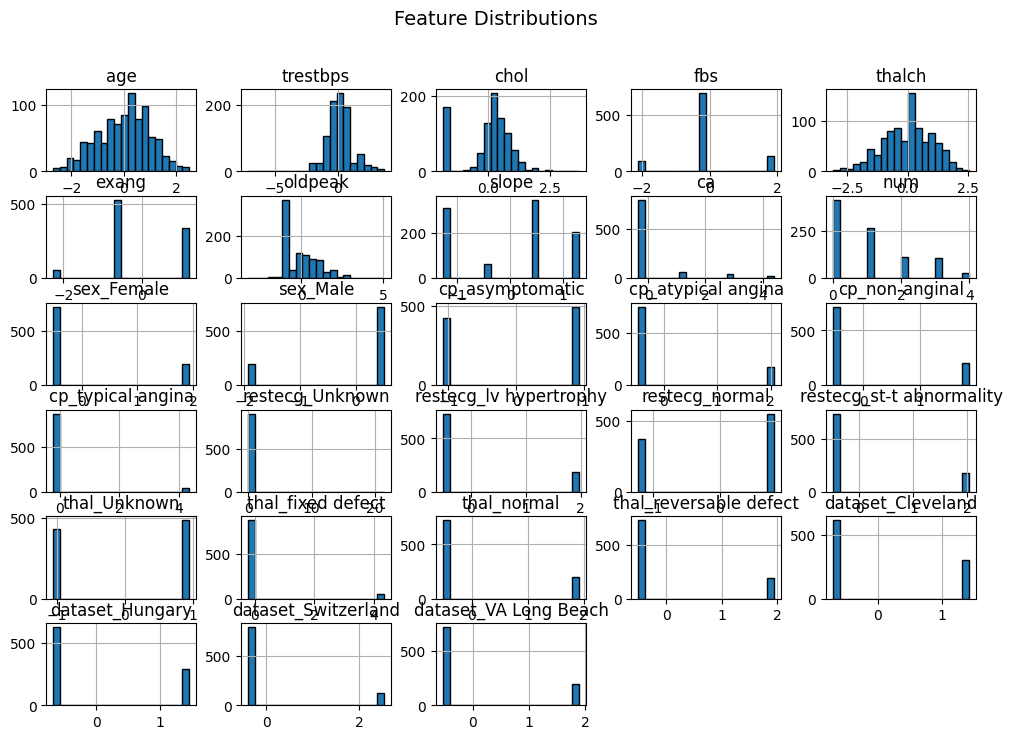

In [ ]:
# Plot distributions of numerical variables
df_copy.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

<ipython-input-75-47db69ce4607>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_copy['num'], palette="coolwarm")


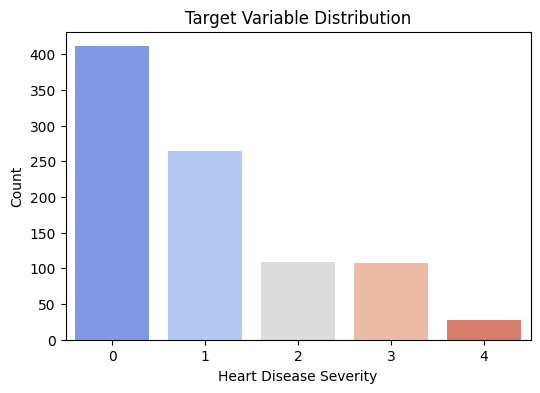

In [ ]:
# Countplot for target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df_copy['num'], palette="coolwarm")
plt.title("Target Variable Distribution")
plt.xlabel("Heart Disease Severity")
plt.ylabel("Count")
plt.show()


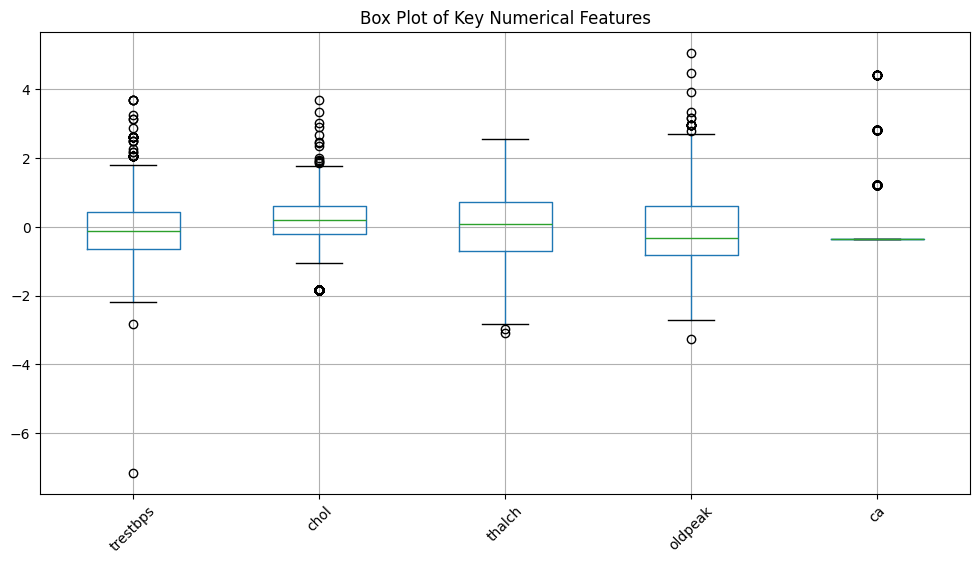

In [ ]:
# Box plots to detect outliers in numerical variables
plt.figure(figsize=(12, 6))
df_copy.boxplot(column=['trestbps', 'chol', 'thalch', 'oldpeak', 'ca'])
plt.title("Box Plot of Key Numerical Features")
plt.xticks(rotation=45)
plt.show()

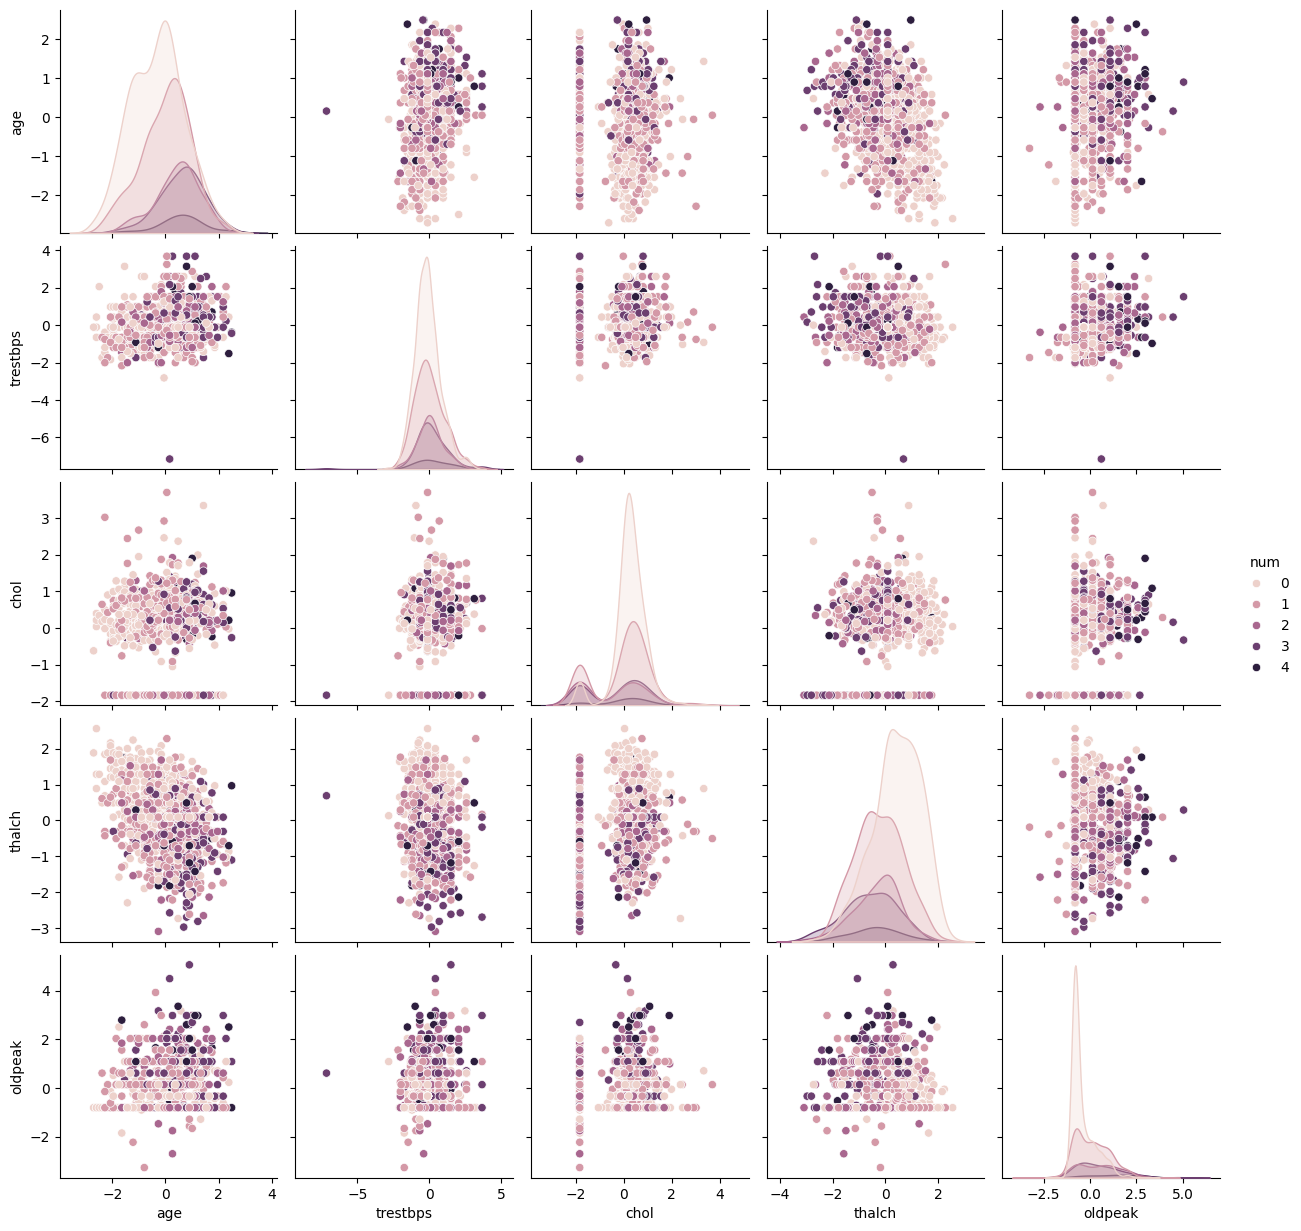

In [ ]:
# Pair plot to visualize feature relationships
sns.pairplot(df_copy[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']], hue='num', diag_kind='kde')
plt.show()


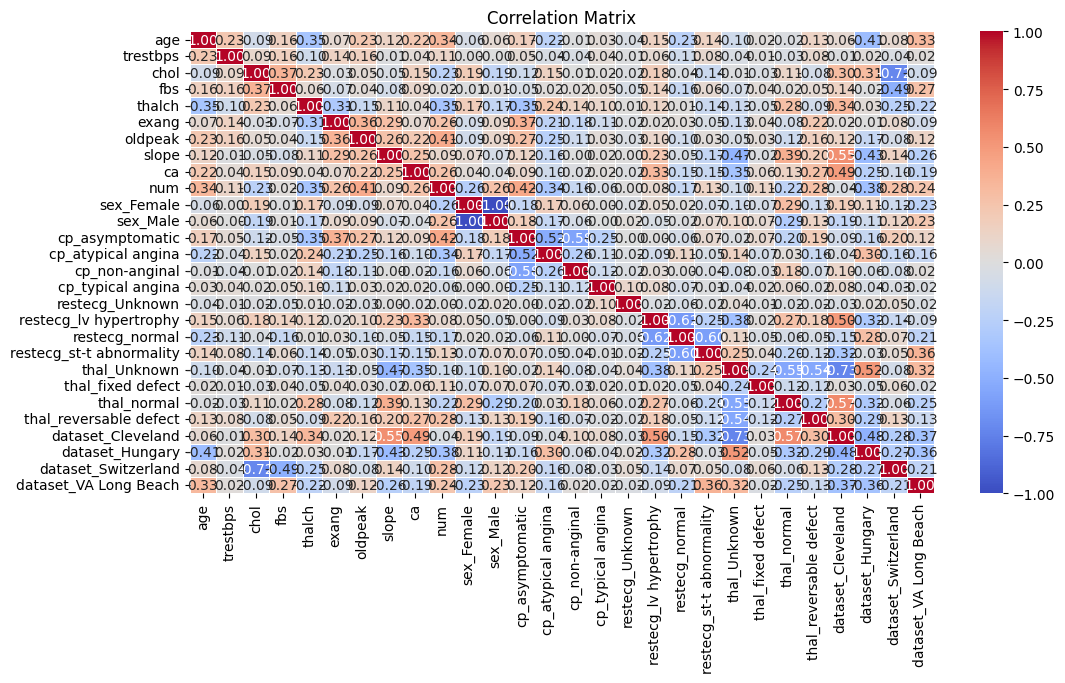

In [ ]:
# Compute correlation matrix
correlation_matrix = df_copy.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Define features (X) and target variable (y)
X = df_copy.drop(columns=['num'])  # Drop target column
y = df_copy['num']

In [ ]:
# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56, stratify=y)

In [ ]:
# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.5652
Precision: 0.5314
Recall: 0.5652
F1 Score: 0.5460


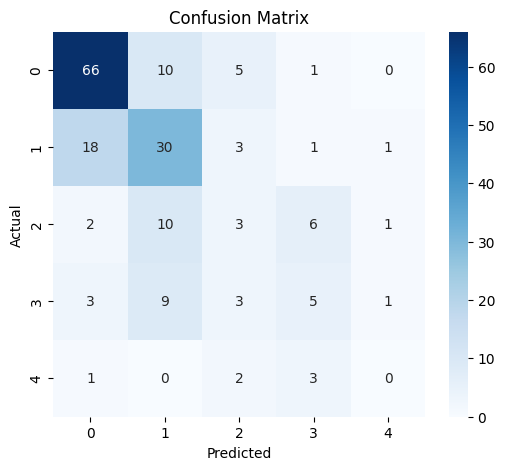

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()